# INPUT 으로 환자의 병록 번호를 넣으면, 그 환자의 SLO 사진이 병렬 (hstack) 로 연결되어 보여지도록

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

In [2]:
def search_slo (dirname):
    try:
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = dirname +'/'+ filename #os.path.join (dirname,filename) 으로 실행시 디렉토리 구분이 \\ 로 되어 추가 연산에서 에러발생
            if os.path.isdir(full_filename):
                search_slo(full_filename)
            else:
                if os.path.splitext(full_filename)[-1] == '.png' and os.path.splitext(full_filename)[0][-3:] == 'slo': #끝3자리 파일명이 slo.png 인 파일을 list_png 로 
                    return slo_png.append(full_filename)
    except PermissionError:
        pass  

In [16]:
small_result = 'c:/py/result_small'
slo_png = []



In [4]:
def ID_slo (ID): #환자의 아이디를 입력하면
    ID = str(ID) #환자 ID의 숫자를 str으로 변환
    filenames = os.listdir(small_result)
    for filename in filenames:
        if filename[0:9] == ID:
            ID_dir = small_result + '/' + filename #작업 폴더는 small_result 임. 추후 변경 요망.
            return search_slo(ID_dir)

In [17]:
slo_png

[]

In [18]:
ID_slo(101001625)

In [19]:
slo_png

['c:/py/result_small/101001625_L/trial0(2018-04-12)/slo.png',
 'c:/py/result_small/101001625_L/trial1(2018-05-10)/slo.png',
 'c:/py/result_small/101001625_L/trial2(2018-06-11)/slo.png']

In [21]:
img_pixel = []
for img in slo_png:
    img_png = Image.open(img)
    pixel = np.array(img_png)
    img_pixel = np.hstack((img_pixel,img_png))
    


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [22]:
img_pixel = []
for n, img in enumerate(slo_png):
    if n == 0:
        img_png = Image.open(img)
        img_pixel = np.array(img_png)
    else:
        img_png = Image.open(img)
        img_pixel = np.hstack((img_pixel,img_png))

In [23]:
img_pixel.shape

(768, 2304)

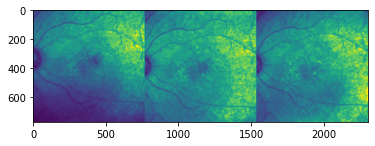

In [24]:
plt.imshow(img_pixel)